# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self driving car recognizing thr car in front

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-07 13:08:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   289MB/s    in 0.4s    

2022-07-07 13:08:27 (289 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspectiong the Data

A very crucial step in Machine Learning is the visualisation of data

And for a Computer Vision project this usually means visualizing many samples


In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walkthrough Pizza Directory and list number of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
# To visualize things programtically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name

array(['pizza', 'steak'], dtype='<U5')

In [8]:
# Let's Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+ '/' + target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image Size:{img.shape}")
  return img

['2188452.jpg']
Image Size:(512, 512, 3)


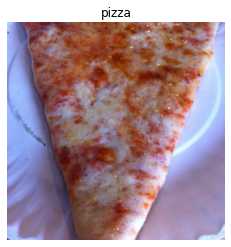

In [9]:
image = view_random_image(target_dir="pizza_steak/train",
                          target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(image)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[189, 219, 253],
        [191, 221, 255],
        [191, 221, 255],
        ...,
        [150, 147, 202],
        [153, 150, 207],
        [152, 148, 207]],

       [[187, 217, 253],
        [188, 218, 254],
        [186, 216, 252],
        ...,
        [152, 149, 206],
        [155, 151, 210],
        [152, 151, 209]],

       [[184, 214, 252],
        [185, 215, 253],
        [182, 212, 250],
        ...,
        [156, 155, 212],
        [159, 158, 216],
        [158, 158, 218]],

       ...,

       [[ 70,  56,  56],
        [ 71,  59,  63],
        [102,  92, 103],
        ...,
        [168, 152, 181],
        [187, 171, 200],
        [198, 179, 211]],

       [[ 83,  66,  50],
        [ 94,  78,  65],
        [ 96,  82,  79],
        ...,
        [205, 186, 218],
        [202, 182, 217],
        [198, 178, 213]],

       [[101,  84,  58],
        [ 84,  68,  45],
        [ 78,  64,  51],
        ...,
        [219, 199, 23

In [11]:
image.shape # Returns Width Height Color Channel

(512, 512, 3)

In [12]:
# Get all the image value 0&1
image/255.0

array([[[0.74117647, 0.85882353, 0.99215686],
        [0.74901961, 0.86666667, 1.        ],
        [0.74901961, 0.86666667, 1.        ],
        ...,
        [0.58823529, 0.57647059, 0.79215686],
        [0.6       , 0.58823529, 0.81176471],
        [0.59607843, 0.58039216, 0.81176471]],

       [[0.73333333, 0.85098039, 0.99215686],
        [0.7372549 , 0.85490196, 0.99607843],
        [0.72941176, 0.84705882, 0.98823529],
        ...,
        [0.59607843, 0.58431373, 0.80784314],
        [0.60784314, 0.59215686, 0.82352941],
        [0.59607843, 0.59215686, 0.81960784]],

       [[0.72156863, 0.83921569, 0.98823529],
        [0.7254902 , 0.84313725, 0.99215686],
        [0.71372549, 0.83137255, 0.98039216],
        ...,
        [0.61176471, 0.60784314, 0.83137255],
        [0.62352941, 0.61960784, 0.84705882],
        [0.61960784, 0.61960784, 0.85490196]],

       ...,

       [[0.2745098 , 0.21960784, 0.21960784],
        [0.27843137, 0.23137255, 0.24705882],
        [0.4       , 0

In [13]:
## An end to end example 

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data(get all the values of pixels in 0 & 1,also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set-up Paths to our directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build CNN model

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),

  tf.keras.layers.Conv2D(10,3,activation="relu"),

  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),

  tf.keras.layers.Conv2D(10,3,activation="relu"),

  tf.keras.layers.Conv2D(10,3,activation="relu"),
  
  tf.keras.layers.MaxPool2D(2),
  
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 208ms/step - loss: 0.5888 - accuracy: 0.6613 - val_loss: 0.4356 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4299 - accuracy: 0.8093 - val_loss: 0.3690 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3983 - accuracy: 0.8220 - val_loss: 0.3875 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3608 - accuracy: 0.8540 - val_loss: 0.3160 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3020 - accuracy: 0.8847 - val_loss: 0.2947 - val_accuracy: 0.8880


In [15]:
preds = model_1.predict(valid_data)

## Trying our Non-Convolutional Model on this dataset

In [16]:
# Set Random Seed
tf.random.set_seed(42)

# Making our model

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling The Model

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data,epochs=25,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 9s 183ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/25
47/47 [==============================] - 8s 176ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/25
47/47 [==============================] - 8s 179ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/25
47/47 [==============================] - 8s 180ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/25
47/47 [==============================] - 8s 178ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/25
47/47 [==============================] - 8s 178ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/25
47/47 [==============================] - 8s 179ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/25
47/47 [==============================

In [17]:
# Get the summary of model_2

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### Improving our Non-CNN Model

In [18]:
# Setting random seed
tf.random.set_seed(42)

# Making model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling A Model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting The Mode
model_3.fit(train_data,epochs=25,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 9s 183ms/step - loss: 3.1778 - accuracy: 0.6267 - val_loss: 1.7049 - val_accuracy: 0.6620
Epoch 2/25
47/47 [==============================] - 8s 179ms/step - loss: 0.8830 - accuracy: 0.7287 - val_loss: 1.1513 - val_accuracy: 0.5520
Epoch 3/25
47/47 [==============================] - 8s 181ms/step - loss: 0.7138 - accuracy: 0.6987 - val_loss: 0.8093 - val_accuracy: 0.5860
Epoch 4/25
47/47 [==============================] - 8s 180ms/step - loss: 0.5638 - accuracy: 0.7573 - val_loss: 0.4607 - val_accuracy: 0.7880
Epoch 5/25
47/47 [==============================] - 8s 177ms/step - loss: 0.5632 - accuracy: 0.7467 - val_loss: 0.5211 - val_accuracy: 0.7540
Epoch 6/25
47/47 [==============================] - 9s 190ms/step - loss: 0.5076 - accuracy: 0.7813 - val_loss: 1.2172 - val_accuracy: 0.5740
Epoch 7/25
47/47 [==============================] - 8s 178ms/step - loss: 0.4671 - accuracy: 0.7807 - val_loss: 0.5554 - val_accuracy: 0.7240
Epoch 


## Breaking Our Classification CNN Model:

1. Become Data with one (Visualize,Visualize,Visualize)
2. Preprocess the data (Prepared it for our model, the main step here was scaling/normalizing)
3. Create a Model
4. Fit the Model
5. Evaluate the Model
6. Adjust different Parameters and improve our Model
7. Repeat Until Satisfied

### 1. Become One with data

['3855584.jpg']
Image Size:(512, 512, 3)
['216720.jpg']
Image Size:(512, 384, 3)


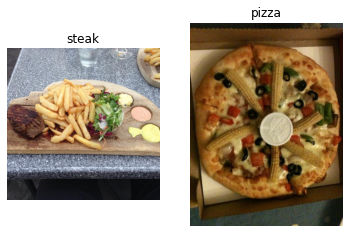

In [19]:
# Visualizing the Data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 2. Preprocess The Data

In [20]:
# Defining Our Dataset
test_dir = 'pizza_steak/test'
train_dir = 'pizza_steak/train'

Next Step is to convert our data into **batches**

A batch is a small subset of data rather than 10000 images at one time a model will look only 32 images in one time 

It does for a couple of reasons:
1. 10,000 images(or more), may not fit into the memory of your processor (GPU)
2. Trying to learn pattrens in 10,000(or more) images in one time could result in the model not being able to learn well.





In [21]:
#Create train and test data generateros and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [22]:
#Load Images from directories and turn them into batches
train_data  = train_datagen.flow_from_directory(directory=train_dir, # target Directory of images
                                                target_size=(224,224), # target size of images
                                                class_mode="binary", # type of data you're working with
                                                batch_size=32) # size of minibatches to load data into 

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of a train data batch 
images, labels = train_data.next() # get the next batch of images/labels in train data

In [24]:
images[:2],images[0].shape

(array([[[[0.70980394, 0.49411768, 0.28235295],
          [0.7176471 , 0.49803925, 0.3137255 ],
          [0.7137255 , 0.49803925, 0.34509805],
          ...,
          [0.28235295, 0.23137257, 0.16470589],
          [0.27450982, 0.22352943, 0.20000002],
          [0.28627452, 0.22352943, 0.16470589]],
 
         [[0.74509805, 0.64705884, 0.39607847],
          [0.7725491 , 0.6784314 , 0.4431373 ],
          [0.7803922 , 0.6901961 , 0.48627454],
          ...,
          [0.25882354, 0.20000002, 0.10980393],
          [0.23137257, 0.18823531, 0.16470589],
          [0.2627451 , 0.22352943, 0.18823531]],
 
         [[0.8235295 , 0.7411765 , 0.5176471 ],
          [0.8313726 , 0.7686275 , 0.5647059 ],
          [0.8196079 , 0.7803922 , 0.5803922 ],
          ...,
          [0.24313727, 0.20392159, 0.10588236],
          [0.23137257, 0.19607845, 0.16862746],
          [0.24705884, 0.20784315, 0.20000002]],
 
         ...,
 
         [[0.        , 0.00392157, 0.        ],
          [0.     

In [25]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

### 3. Making a CNN model(start with the baseline)
A Baseline is a relatively simple model or existing result that you setup when begining of machine learning experiment and then as you keep experimenting, you try to beat the baseline

In [26]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPool2D,Dense,Flatten,Conv2D,Activation
from tensorflow.keras import Sequential


In [27]:
# Create the model (this will be our baseline,a layer covolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10,# filter is the number of sliding window going across  an input (higher=more complex model)
         kernel_size=3,# the size of sliding window going across the input
         strides=1,# the size of steps sliding windows take across an input
         padding="valid", # if padding="same" output shape is same as input shape, if "valid" output shape get compressed
         activation="relu",
         input_shape=(224,224,3)), # input layer (specify input shape)
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid"), #Output layer (specify output shape)
])

In [28]:
# Complie the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])


In [29]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit The Mode

In [30]:
# Check the length of training data and testing data
len(train_data),len(test_data)

(47, 16)

In [31]:
history_4 = model_4.fit(train_data, # this is combination of labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.0026 - accuracy: 0.6820 - val_loss: 0.4275 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4515 - accuracy: 0.8140 - val_loss: 0.4440 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3086 - accuracy: 0.8747 - val_loss: 0.3770 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.1421 - accuracy: 0.9533 - val_loss: 0.4575 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.0726 - accuracy: 0.9827 - val_loss: 0.6441 - val_accuracy: 0.7860


### 5. Evaluting Our Model

It looks like our model is learning something let's evaluate

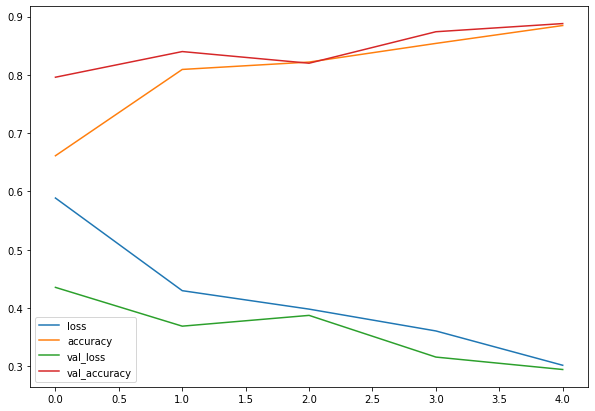

In [32]:
# Ploting Training Curve
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [33]:
# Plot the validation and training curve sepratley
def plot_loss_curve(history):
  """
  Returns seprate loss curves for training and validation matrics 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.figure()
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

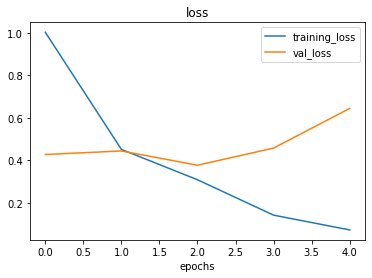

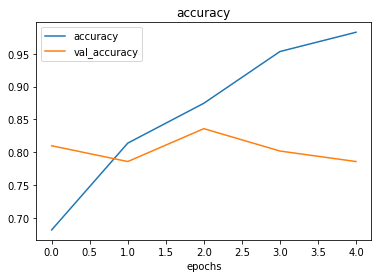

In [34]:
# Checkout out loss and accuracy of our model_4
plot_loss_curve(model_4.history)

### 6. Adjust the model parameter

Fitting a machine(deep) learning model come in 3 steps:

0. Creating a baseline
1. Overfitting a large model
2. Reduce Overfitting

Wayes to reduce overfitting:

* **If The difference between training_loss curve and val_loss curve is more our model is underfitting or overfitting**

* **If our training curve is decreasing and val_loss curve increasing our model is overfitting**  

* Increase the numbers of Conv layers
* Increase the numbers of Conv filters
* Add another Dense Layer to the output of flatten layer

Reduce overfitting:
* Add data augmentation 
* Add regularization layers(such as MaxPool2D)
* Add more data...


  *Reducing of overfitting is know as regularization*

In [35]:
#Create the model

model_5 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [36]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
history_5 = model_5.fit(train_data,epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 198ms/step - loss: 0.6165 - accuracy: 0.6673 - val_loss: 0.4915 - val_accuracy: 0.7680
Epoch 2/10
47/47 [==============================] - 9s 186ms/step - loss: 0.4890 - accuracy: 0.7760 - val_loss: 0.3984 - val_accuracy: 0.8420
Epoch 3/10
47/47 [==============================] - 9s 186ms/step - loss: 0.4319 - accuracy: 0.8067 - val_loss: 0.3967 - val_accuracy: 0.8180
Epoch 4/10
47/47 [==============================] - 9s 186ms/step - loss: 0.4150 - accuracy: 0.8120 - val_loss: 0.3483 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 9s 185ms/step - loss: 0.3759 - accuracy: 0.8387 - val_loss: 0.3838 - val_accuracy: 0.8120
Epoch 6/10
47/47 [==============================] - 9s 186ms/step - loss: 0.3695 - accuracy: 0.8380 - val_loss: 0.3270 - val_accuracy: 0.8660
Epoch 7/10
47/47 [==============================] - 9s 188ms/step - loss: 0.3518 - accuracy: 0.8380 - val_loss: 0.3435 - val_accuracy: 0.8680
Epoch

In [38]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


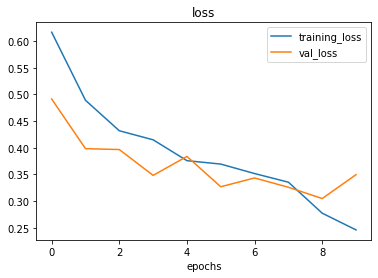

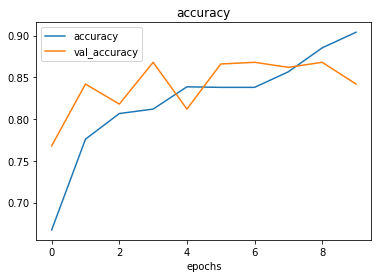

In [40]:
#plot loss Curvers
plot_loss_curve(model_5.history)

### Openning our Bag of tricks and finding data augmentation

In [41]:
# Create ImageDataGenrator trainig instance 
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without augumentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

Data Augmentation is the process of altering our training data,leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) pattrens. Alltering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [42]:
# Import Data and augmented from trainig directory
print("Augmented Trainig Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   target_size=(224,224),
                                                                   shuffle=False) # For demonstration only

print("Non Augmented Trainig Data")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               class_mode="binary",
                                               target_size=(224,224),
                                               shuffle=False)

print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(directory="pizza_steak/test",
                                             batch_size=32,
                                             class_mode="binary",
                                             target_size=(224,224),
                                             shuffle=False)

Augmented Trainig Data
Found 1500 images belonging to 2 classes.
Non Augmented Trainig Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 500 images belonging to 2 classes.


In [43]:
Images ,labels = train_data.next()
Images_agumented,labels_augumented = train_data_augmented.next() 

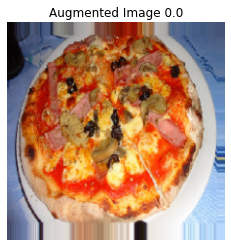

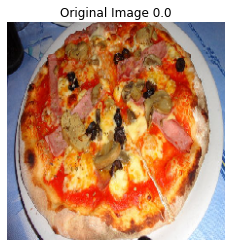

<Figure size 432x288 with 0 Axes>

In [44]:
import random
random_num = random.randint(0,32)
plt.imshow(Images_agumented[random_num])
plt.title(f"Augmented Image {labels_augumented[random_num]}")
plt.axis(False)
plt.figure();

plt.imshow(Images[random_num])
plt.title(f"Original Image {labels[random_num]}")
plt.axis(False)
plt.figure();

In [45]:
# Create a model Train on augumented data
model_6 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [46]:
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [47]:
history_6=model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.7046 - accuracy: 0.4093 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6896 - accuracy: 0.5207 - val_loss: 0.6692 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6744 - accuracy: 0.6033 - val_loss: 0.5963 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6786 - accuracy: 0.5907 - val_loss: 0.6314 - val_accuracy: 0.5480
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6498 - accuracy: 0.6073 - val_loss: 0.5274 - val_accuracy: 0.7480


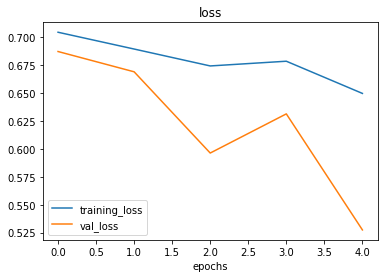

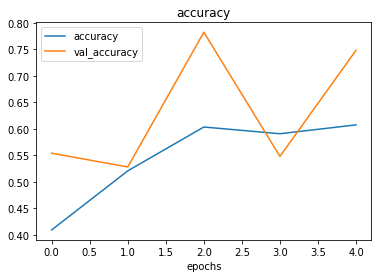

In [48]:
# Check our model trainig curve
plot_loss_curve(history_6)

### 7. Repeat Until Statified

*   Increase the number of layers eg `Conv2D or MaxPoll2D`
*   Increase the number of filter in Convolution Layer(eg from 20 to 35)
*   Increase the Kernel Size
*   Train for Longer (more epochs)
*   Find Ideal learning Rate
*   Get More Data
*   Use **transfer learning** to laverage what other model has learn and you can tranfer that learning



In [49]:
model_7 = Sequential([
  Conv2D(30,4,activation="relu",input_shape=(224,224,3)),
  Conv2D(30,4,activation="relu"),
  MaxPool2D(),
  Conv2D(30,4,activation="relu"),
  Conv2D(30,4,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [50]:
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [51]:
model_7.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 253ms/step - loss: 11.0278 - accuracy: 0.6313 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6993 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6921 - accuracy: 0.5427 - val_loss: 0.6864 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6683 - accuracy: 0.6767 - val_loss: 0.5488 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6473 - accuracy: 0.6447 - val_loss: 0.6827 - val_accuracy: 0.6320


## Making Predection with Custom Image

--2022-07-07 13:22:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-07-07 13:22:00 (226 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



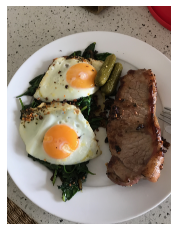

In [52]:
# view our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
steak.shape

(4032, 3024, 3)

In [64]:
import tensorflow as tf
def load_and_prep_image(filename,img_shape=224):
  """
  Reads and image from a filename, turns it into a tensor and reshape it to (img_shape,img_shape,colour_channels).
  """
  # Read in Image
  img = tf.io.read_file(filename)
 # Decode read file into a tensor
  img = tf.image.decode_image(img)
 # Resize our image
  img = tf.image.resize(img,size=[img_shape,img_shape])
 # Rescale the image
  img = img/225.
  return img

In [66]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [72]:
pred=model_5.predict(tf.expand_dims(steak,axis=0))

In [73]:
class_names = ['Pizza','Steak']

In [74]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'Steak'

In [75]:
def pred_and_plot(model,filename,class_name=class_names):
  """
  Imports images located at filname,make a predection with image and plots image with predection
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  # Make a predection
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predection class
  pred_class = class_name[int(tf.round(pred))]

  # plot image

  plt.imshow(img)
  plt.title(f"Predection: {pred_class}")
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


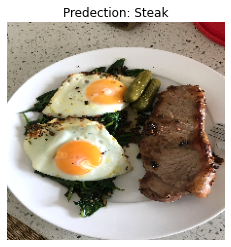

In [76]:
pred_and_plot(model_5,"03-steak.jpeg")

In [79]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-07-07 13:53:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-07 13:53:51 (183 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


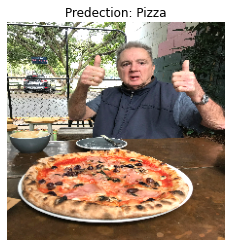

In [80]:
pred_and_plot(model_5,"03-pizza-dad.jpeg")